# Week 2

## Lecture 3: Probability and Hashing

** Stochastic Processes **

An ongoing process where the next state might depend on _both the previous states and some random element._

### 1. Frequentist Probability

#### What's the probability (simulated) of rolling a dice and 5 consecutive ones?

In [2]:
import random

def rollDie():
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    return result

In [4]:
print rollN(10)

4664154415


In [6]:
type(rollN(10)) # the outcome of the rollN Simulation is a string 

str

In [12]:
def getTarget(goal):
    numTries = 0
    numRolls = len(goal)
    while True:
        numTries += 1
        result = rollN(numRolls)
        if result == goal:
            return numTries

def runSim(goal, numTrials): # run sim call getTarget multiple times
    total = 0
    for i in range(numTrials):
        total += getTarget(goal)
    Average_Num_Tries =  total/float(numTrials)
    print 'Probability =', 1.0/Average_Num_Tries

In [13]:
runSim('11111', 100)

Probability = 0.000147901864155


In [19]:
def atLeastOneOne(numRolls, numTrials):
    numSuccess = 0
    for i in range(numTrials):
        rolls = rollN(numRolls)
        if '1' in rolls:
            numSuccess += 1
        fracSuccess = numSuccess/float(numTrials)
    print fracSuccess

In [22]:
atLeastOneOne(10, 1000)

0.859


#### What's the probability (simulated) of rolling a dice and no ones?

In [17]:
(5.0/6)**5

0.401877572016461

** IF you have 100 students in your class today and you promised to give 100 dollar to whomever that is having his/her birthday today. What is the probability of you not paying the money?**

In [18]:
(364.0/365)**100

0.7600670738159009

### 2. Hashing

In [1]:
import random

In [2]:
def strToInt(s):
    number = ''
    for c in s:
        number = number + str(ord(c))
    index = int(number)
    return index

In [3]:
print 'Index =', strToInt('a')

Index = 97


In [4]:
print 'Index =', strToInt('John is a cool dude')

Index = 74111104110321051153297329911111110832100117100101


In [6]:
def hashStr(s, tableSize = 101):
    number = ''
    for c in s:
        number = number + str(ord(c))
    index = int(number)%tableSize
    return index

In [7]:
print hashStr('a')
print hashStr('John is a cool dude')

97
66


In [8]:
print hashStr('Eric', 7)
print hashStr('Chris', 7)
print hashStr('Sarina', 7)

2
3
5


### How do you solve a collision problem? 

Initializing each element of the hash table to be an empty list, which is called a hash bucket. 

But you will run into the trade-off between time and space:

Large table, fewer collision, quicker look up. 

Small table, more collision, slower look up. 

### But what is the likelihood of collision?  --  Class Index Example

In [10]:
import random


class intDict(object):
    """A dictionary with integer keys"""
    
    def __init__(self, numBuckets):
        """Create an empty dictionary"""
        self.buckets = []
        self.numBuckets = numBuckets
        for i in range(numBuckets):
            self.buckets.append([])
            
    def addEntry(self, dictKey, dictVal):
        """Assumes dictKey an int.  Adds an entry."""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for i in range(len(hashBucket)):
            if hashBucket[i][0] == dictKey:
                hashBucket[i] = (dictKey, dictVal)
                return
        hashBucket.append((dictKey, dictVal))
        
    def getValue(self, dictKey):
        """Assumes dictKey an int.  Returns entry associated
           with the key dictKey"""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for e in hashBucket:
            if e[0] == dictKey:
                return e[1]
        return None
    
    def __str__(self):
        res = ''   # Change 1
        for b in self.buckets:
            for t in b:
                res = res + str(t[0]) + ':' + str(t[1]) + ','
        return '{' + res[:-1] + '}' # Change 2

### Use the int dict 

In [11]:
D = intDict(29)
for i in range(20):
    #choose a random int in range(10**5)
    key = random.choice(range(10**5))
    D.addEntry(key, i)

In [12]:
print '\n', 'The buckets are:'
for hashBucket in D.buckets: #violates abstraction barrier
    print '  ', hashBucket


The buckets are:
   []
   []
   []
   [(56611, 17)]
   [(91789, 3)]
   []
   [(61428, 8)]
   [(92633, 15)]
   []
   []
   []
   [(9494, 1)]
   [(26170, 18)]
   [(46268, 12)]
   []
   [(96759, 4), (25941, 7)]
   [(69529, 5), (80694, 13), (52593, 19)]
   [(12777, 10)]
   [(47955, 6)]
   []
   [(72317, 16)]
   [(77132, 9)]
   [(41811, 11)]
   []
   []
   [(3389, 0), (92187, 14)]
   []
   []
   [(90392, 2)]


****

## Lecture 4: Stochastic Programming and Statistical Thinking

### 1. LAW OF LARGE NUMBERS

In [1]:
import random

In [2]:
import pylab

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# flip coin function

#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

In [4]:
def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/float(numFlips)

In [5]:
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)

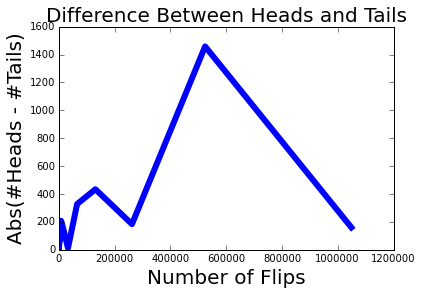

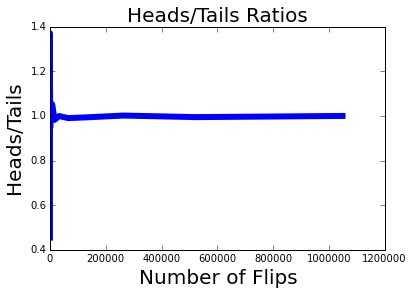

In [7]:
random.seed(0)
flipPlot(4, 20)
pylab.show()

Plot 1 has only isolated points, not a trend! Plot 2 has a linear scaling. 

In [8]:
# improvement on the original plots


def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)
    #Additional code to produce different plots from the
    #same data
    pylab.figure()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios, 'bo')
    pylab.semilogx()

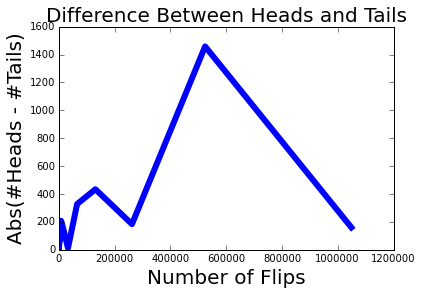

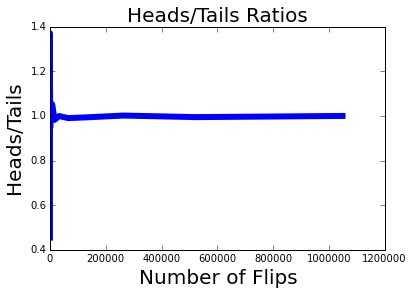

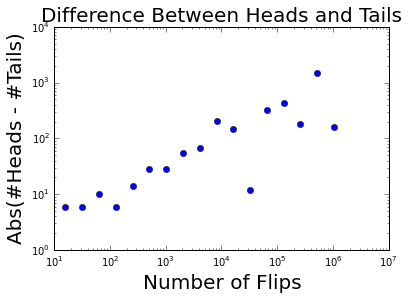

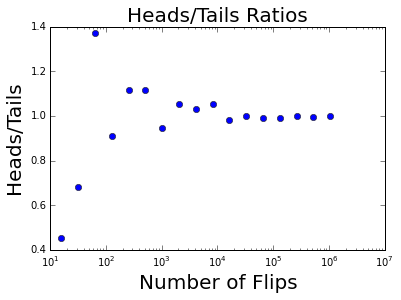

In [9]:
random.seed(0)
flipPlot(4, 20)
pylab.show()

 ### Observations:
 
It's never possible to be **assured** of the perfect accuracy through sampling, unless you sample the entire population. 

### How much sampling is enough? 

Enough being have a justified confidence that you can infer from the sample to the population that the sample is drawn. ** Dependent on the varaince of the underlying population.**

We measure the variance of the outcomes of multiple trails. 

In [11]:
import pylab

%pylab inline

#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
import random

In [13]:
def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5

In [17]:
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return numHeads, numTails

def flipPlot(minExp, maxExp, numTrials):
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.plot(xAxis, meanRatios, 'bo')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure()
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()

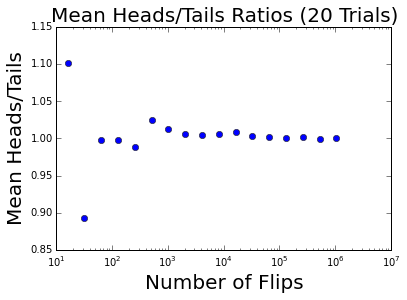

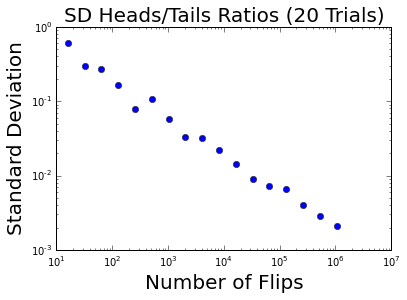

In [18]:
flipPlot(4, 20, 20)
pylab.show()

The standard deviation drop linearly with the increase of the number of flip. 

In [16]:
def flipPlot2(minExp, maxExp, numTrials):
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.plot(xAxis, meanRatios, 'bo')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure()
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()
    #Additional code to look at difference in abolute
    #number of heads and tails
    pylab.figure()
    pylab.title('Mean abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean abs(#Heads - #Tails')
    pylab.plot(xAxis, meanDiffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.plot(xAxis, diffsSDs, 'bo')
    pylab.title('SD abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()

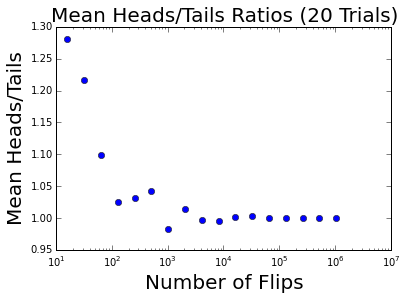

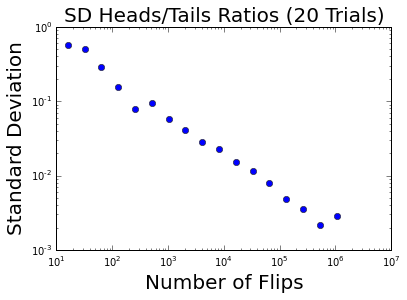

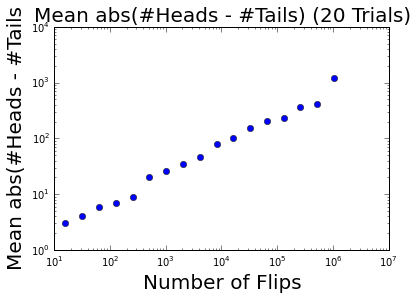

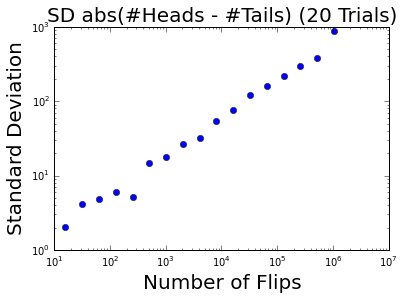

In [19]:
flipPlot2(4, 20, 20)
pylab.show()

1. Plot 1, there are some variation around small number of trails (left) and then it stabilized. 

2. Plot 2, with the increase of # of trails, the standard deviation drop linearly and drastically. 

3. Plot 3, absolute Mean difference increase.  

4. Why does the SD increase with the increase of number of flips? Does that means we have less confidence? **NO.**

**The standard deviation should always be viewed in the context of the means.** the number of trails increase to the billion and SD increase to the million, which means the dispersion of the data is small. (Recall plot 3, the abs mean increases too.)

#### Note: You should not compare the difference in standard deviation when you have difference means. 

### Standard Deviation and Histograms

Question, how do you compare the SD of two samples with different means?

**Answer: Coefficient of Variation (CV)** take the standard deviation and devided by the mean. 

The coefficient of variation is the standard deviation divided by the mean. Loosely, it's a measure of how variable the population is in relation to the mean.

From [wiki CV](https://en.wikipedia.org/wiki/Coefficient_of_variation):

In probability theory and statistics, the coefficient of variation (CV), also known as relative standard deviation (RSD), is a standardized measure of dispersion of a probability distribution or frequency distribution. It is often expressed as a percentage, and is defined as the ratio of the standard deviation $sigma$  to the mean \ \mu  (or its absolute value, | \mu |). 


Our goal is to look at the variation relative to the mean. 

In [38]:
def CV(X):
    mean = sum(X)/float(len(X))
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('NaN')

In [25]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1.0
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

# flipSim is a lot shorter because the plotting is moved
# to the other function. 

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'Mean = ' + str(round(mean, 4))
               + '\nSD = ' + str(round(sd, 4)))

    # put a text box relative to the axis 

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 21)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 21)
    pylab.xlim(xmin, xmax)
    ymin, ymax = pylab.ylim()
    labelPlot(numFlips2, numTrials, mean2, sd2)
    
# labeling and contruction of the plot is seprate this time. 

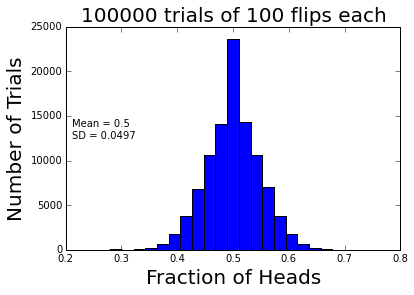

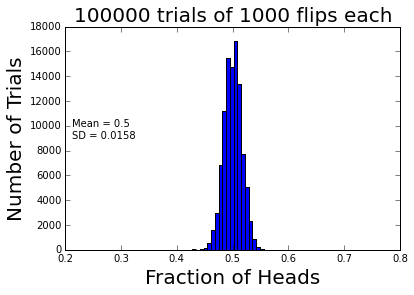

In [26]:
pylab.seed(0)    
makePlots(100,1000,100000)
pylab.show()

The means doesn't differ a lot but look at that standard deviation. Second one is a much more "tighter" distribution of this. 

***

### Produce a histogram:

x-range = 0.0 - 1.0
y-range = 0.0 - 10000.0


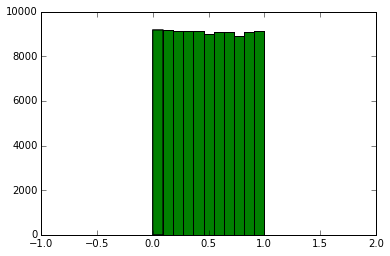

In [24]:
vals = []
for i in range(100000):
    num = random.random()
    vals.append(num)
pylab.hist(vals, bins = 11)
xmin, xmax = pylab.xlim() # invoke with no argument
ymin, ymax = pylab.ylim()
print 'x-range =', xmin, '-', xmax # see what is the min and max of the axis
print 'y-range =', ymin, '-', ymax
pylab.figure
pylab.hist(vals, bins = 11)
pylab.xlim(-1.0, 2.0) # modify the x axis
pylab.show()

***

### L4 PROBLEM 3

Write a function, ```python stdDevOfLengths(L)``` that **takes in a list of strings, L, and outputs the standard deviation of the lengths of the strings.** Return float('NaN') if L is empty.

In [45]:
def stdDevOfLengths(L):
    """
    L: a list of strings

    returns: float, the standard deviation of the lengths of the strings,
      or NaN if L is empty.
    """
    if (len(L) == 0):
        return float('NaN')
    
    # compute mean first
    sumVals = 0
    for s in L:
        sumVals += len(s)
    meanVals = sumVals / float(len(L))

    # compute variance (average squared deviation from mean)
    sumDevSquared = 0
    for s in L:
        sumDevSquared += (len(s) - meanVals)**2
    variance = sumDevSquared / float(len(L))

    # standard deviation is the square root of the variance
    stdDev = variance**(.5)

    return stdDev

In [47]:
# using listcomps
def stdDevOfLengths2(L):
    n = float(len(L))
    if (n == 0):
        return float('NaN')
    lengths    = [len(s) for s in L]
    mean       = sum(lengths) / n
    squaredDev = [(l-mean)**2 for l in lengths]
    variance   = sum(squaredDev) / n    
    return variance**(.5)

In [48]:
# using a separate function for std dev from lecture video
def stdDev(X):
    mean = sum(X) / float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5

def stdDevOfLengths3(L):
    n = len(L)
    if (n == 0):
        return float('NaN')
    X = []
    for s in L:
        X.append(len(s))
    return stdDev(X)

In [42]:
L = ['a', 'z', 'p']

In [46]:
stdDevOfLengths(L)

0.0

### L4 PROBLEM 4

In [40]:
a = [1,2,3]
b = [11,12,13]
c = [0.1,0.1,0.1]

d = [10, 4, 12, 15, 20, 5]

In [39]:
print CV(a), CV(b), CV(c)

0.408248290464 0.068041381744 1.38777878078e-16


In [41]:
CV(d)

0.50343174926776213

# **When will CV be invalid?**

Coefficient of Variation should only be computed on ratio scales (i.e., data where there is a "true" zero, like temperatures in Kelvin, or heights, or sizes of populations, etc). Coefficient of Variation may not be meaningful for data that does not have a "true" zero.

***

## Problem Set 2

Note to self: When submit, better submit the whole thing. 

In [27]:
# 6.00.2x Problem Set 2: Simulating robots

import math
import random

import ps2_visualize
import pylab

# For Python 2.7:
from ps2_verify_movement27 import testRobotMovement

**Position**
Stores the x- and y-coordinates of a robot in a room.

In [1]:
# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):  
        return "(%0.2f, %0.2f)" % (self.x, self.y)


### Problem 1: RectangularRoom Class

In this problem you will implement two classes, RectangularRoom on this page and Robot on the next.

For the RectangularRoom class, decide what fields you will use and decide how the following operations are to be performed:

- Initializing the object

- Marking an appropriate tile as cleaned when a robot moves to a given position (casting floats to ints - and/or the function math.floor - may be useful to you here)

- Determining if a given tile has been cleaned

- Determining how many tiles there are in the room

- Determining how many cleaned tiles there are in the room

- Getting a random position in the room

- Determining if a given position is in the room

In [5]:
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    DIRTY = 0
    CLEAN = 1    

    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        """
        
        self.width = width
        self.height = height
        self.room = {}
        for r in range(0, width):
            for c in range(0, height):
                self.room[(r,c)] = RectangularRoom.DIRTY
    
    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        
        x = int(pos.x)
        y = int(pos.y)
        self.room[(x, y)] = RectangularRoom.CLEAN

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """
        
        if self.room[(m, n)] == RectangularRoom.CLEAN:
            return True
        else:
            return False
    
    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        return len(self.room)

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        
        cleanRooms = 0

        for k in self.room:
            if self.room[k] == RectangularRoom.CLEAN:
                cleanRooms += 1
        return cleanRooms

    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        x = random.randint(0, self.width-1)
        y = random.randint(0, self.height-1)
        return Position(x, y)

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        if pos.x >= 0 and pos.y >= 0:
            x = math.floor(pos.x)
            y = math.floor(pos.y)
            if (x, y) in self.room:
                return True
            else:
                return False

In [8]:
# Create a room of size 25

room = RectangularRoom(5, 5)
room.getNumTiles() 

25

In [9]:
# creates a number of randomly sized rooms and checks 
# the number of tiles by calling room.getNumTiles(). 

In [10]:
room = RectangularRoom(9, 4)
room = RectangularRoom(19, 8)
room = RectangularRoom(5, 3)
room = RectangularRoom(2, 3)
room = RectangularRoom(11, 10)

In [11]:
room.getNumTiles()

110

In [12]:
# This tests that all squares are properly marked as unclean
# by calling the isTileCleaned() and getNumCleanedTiles() methods.

room = RectangularRoom(4,6)

In [19]:
room.isTileCleaned(1,4)

False

In [20]:
# This test creates a randomly sized room and checks the
# number of clean tiles by calling room.getNumCleanTiles(). 
# Then, the tiles in the room are cleaned and the check is performed again.

room = RectangularRoom(6, 5)

In [21]:
room.getNumCleanedTiles()

0

### Problem 1: Robot Class

For the Robot class, decide what fields you will use and decide how the following operations are to be performed:

- Initializing the object

- Accessing the robot's position

- Accessing the robot's direction

- Setting the robot's position

- Setting the robot's direction

In [22]:
class Robot(object):
    """
    Represents a robot cleaning a particular room.
    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.
    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.
        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        self.room = room
        self.speed = speed
        self.position = room.getRandomPosition()
        self.room.cleanTileAtPosition(self.position)
        self.direction = random.randint(0, 360-1)

    def getRobotPosition(self):
        """
        Return the position of the robot.
        returns: a Position object giving the robot's position.
        """
        return self.position
    
    def getRobotDirection(self):
        """
        Return the direction of the robot.
        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        return self.direction

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.
        position: a Position object.
        """
        self.position = position

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.
        direction: integer representing an angle in degrees
        """
        self.direction = direction

    def updatePositionAndClean(self):
        """
        Simulate the raise passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError # don't change this!

### PROBLEM 2: STANDARDROBOT CLASS

Each robot must also have some code that tells it how to move about a room, which will go in a method called updatePositionAndClean.

Ordinarily we would consider putting all the robot's methods in a single class. However, later in this problem set we'll consider robots with alternate movement strategies, to be implemented as different classes with the same interface. These classes will have a different implementation of updatePositionAndClean but are for the most part the same as the original robots. Therefore, we'd like to use inheritance to reduce the amount of duplicated code.

We have already refactored the robot code for you into two classes: the Robot class you completed in Problem 1 (which contains general robot code), and a StandardRobot class that inherits from it (which contains its own movement strategy).

Complete the updatePositionAndClean method of StandardRobot to simulate the motion of the robot after a single time-step (as described on the Simulation Overview page).

In [23]:
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.
    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall, it *instead* chooses a new direction
    randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the raise passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        newPosition = self.position.getNewPosition(self.direction, self.speed)
        #if robot hits the wall and newPosition is outside the room:
        # choose random direction and get new position until it fits in the room
        while not self.room.isPositionInRoom(newPosition):
            self.direction = random.randint(1,359)
            newPosition = self.position.getNewPosition(self.direction, self.speed)
        #Position is inside the room, set robot here and clean tile
        self.setRobotPosition(newPosition)
        self.room.cleanTileAtPosition(newPosition)

# Uncomment this line to see your implementation of StandardRobot in action!
#testRobotMovement(StandardRobot, RectangularRoom)

### PROBLEM 3: RUNNING THE SIMULATION

In this problem you will write code that runs a complete robot simulation.

In [25]:
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.
    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.
    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """
    results = []
    for run in range(num_trials):
        #INIT
        room = RectangularRoom(width, height)
        robots = [] #arr to save robots
        for num in range(num_robots):
            #create robots
            robot = robot_type(room, speed)
            robots.append(robot)

        roomCoverage = room.getNumCleanedTiles() / room.getNumTiles()
        counter = 0
        #Make robots clean the room
        while roomCoverage <= float(min_coverage):
            for robo in robots:
                robo.updatePositionAndClean()
            roomCoverage = float(room.getNumCleanedTiles()) / room.getNumTiles()
            counter += 1
        results.append(counter)
    #calculate mean
    mean = sum(results) / len(results)
    return float(mean)

In [28]:
runSimulation(1, 1.0, 5, 5, 0.9, 30, StandardRobot)

54.0

### Optional: VISUALIZING ROBOTS

### PROBLEM 4: RANDOMWALKROBOT CLASS

In [29]:
class RandomWalkRobot(Robot):
    """
    A RandomWalkRobot is a robot with the "random walk" movement strategy: it
    chooses a new direction at random at the end of each time-step.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.
        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        self.direction = random.randint(1,359)
        newPosition = self.position.getNewPosition(self.direction, self.speed)
        #if robot hits the wall and newPosition is outside the room:
        # choose random direction and get new position until it fits in the room
        while not self.room.isPositionInRoom(newPosition):
            self.direction = random.randint(1,359)
            newPosition = self.position.getNewPosition(self.direction, self.speed)
        #Position is inside the room, set robot here and clean tile
        self.setRobotPosition(newPosition)
        self.room.cleanTileAtPosition(newPosition)

#testRobotMovement(RandomWalkRobot, RectangularRoom)


def showPlot1(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print "Plotting", num_robots, "robots..."
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))
    pylab.plot(num_robot_range, times1)
    pylab.plot(num_robot_range, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

#showPlot1("title", "labeX", "labelY")
    
def showPlot2(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300/width
        print "Plotting cleaning time for a room of width:", width, "by height:", height
        aspect_ratios.append(float(width) / height)
        times1.append(runSimulation(2, 1.0, width, height, 0.8, 200, StandardRobot))
        times2.append(runSimulation(2, 1.0, width, height, 0.8, 200, RandomWalkRobot))
    pylab.plot(aspect_ratios, times1)
    pylab.plot(aspect_ratios, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()